In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('vw.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


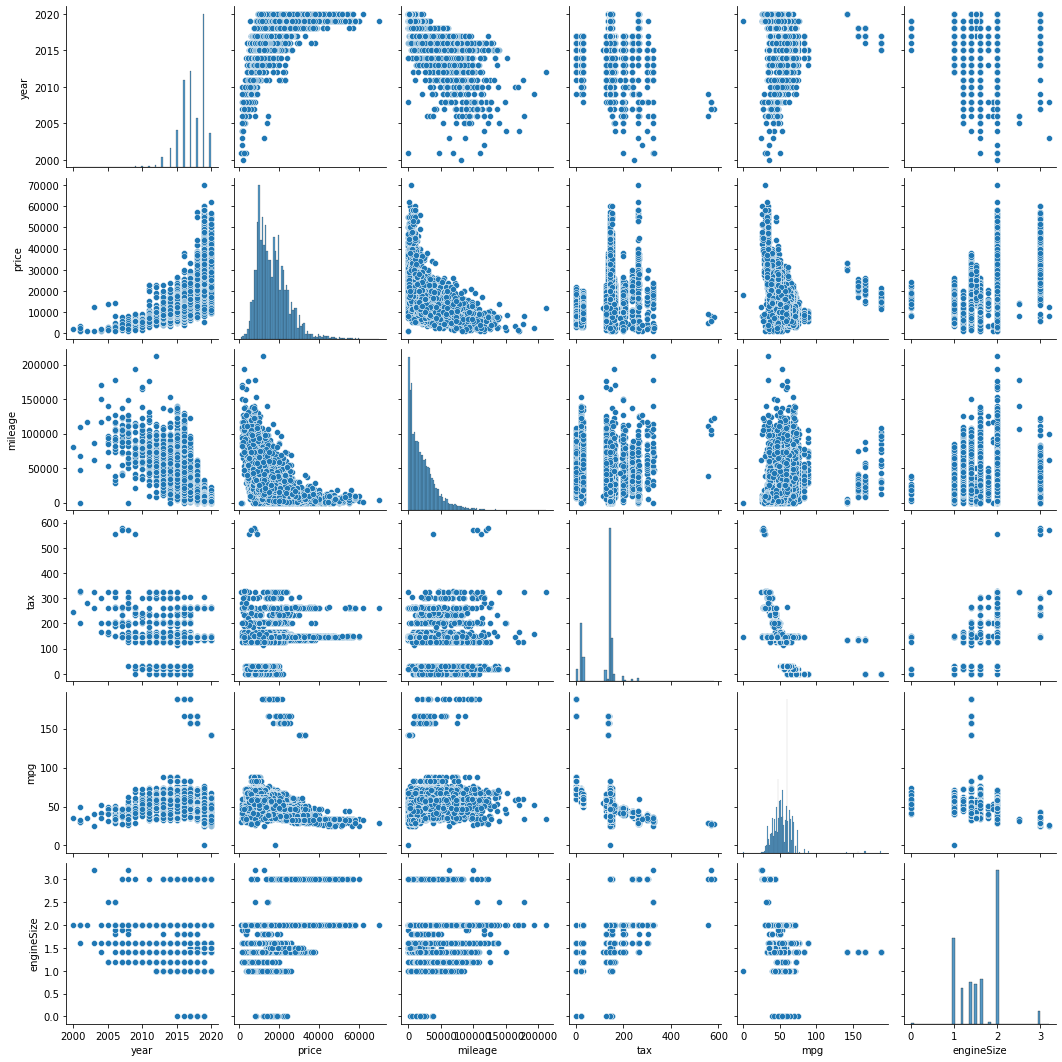

In [5]:
sns.pairplot(df);

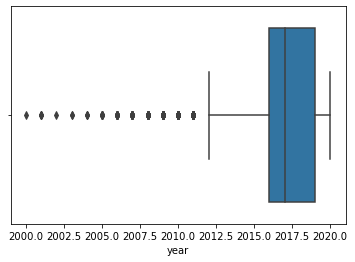

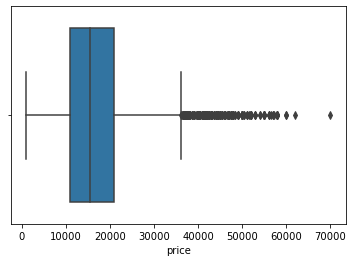

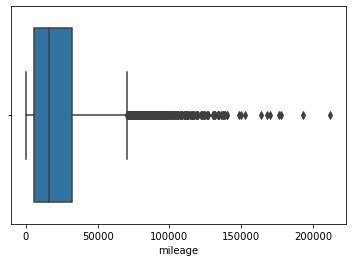

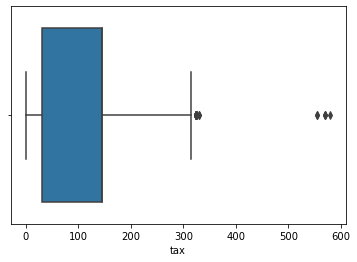

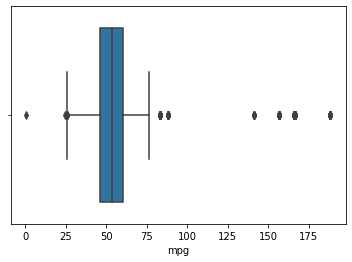

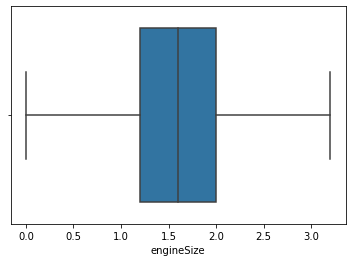

In [6]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.subplots()
        sns.boxplot(x = df[i]);

**Transform categorical variables to numerical ones**

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        data = le.fit_transform(df[i])
        df[i] = data;

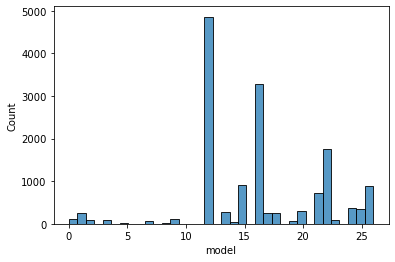

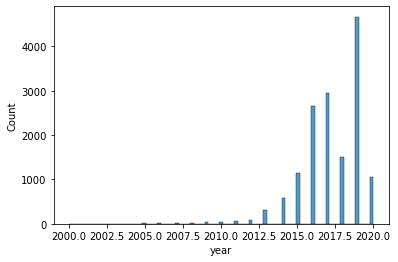

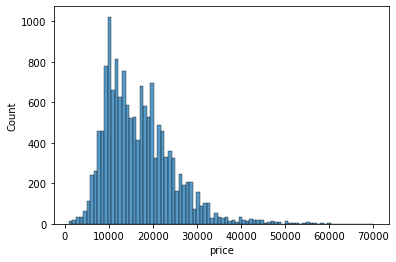

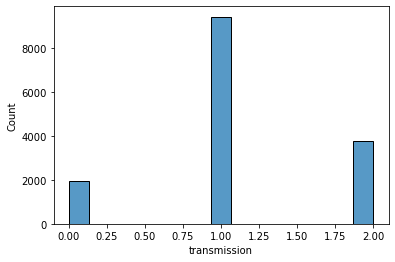

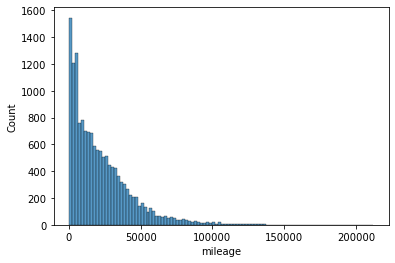

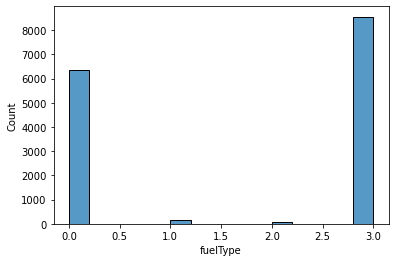

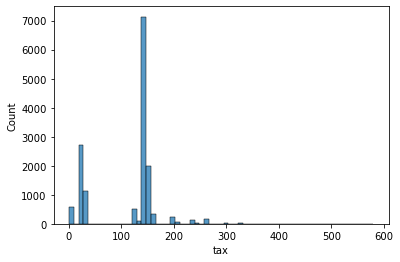

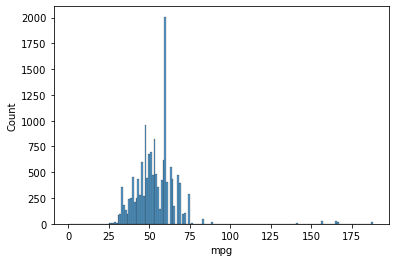

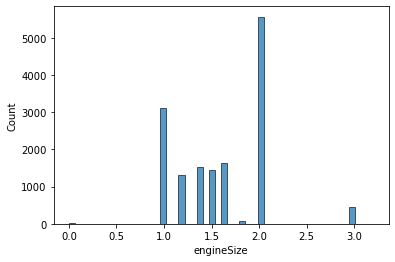

In [8]:
for i in df.columns:
    plt.subplots()
    sns.histplot(x = df[i]);

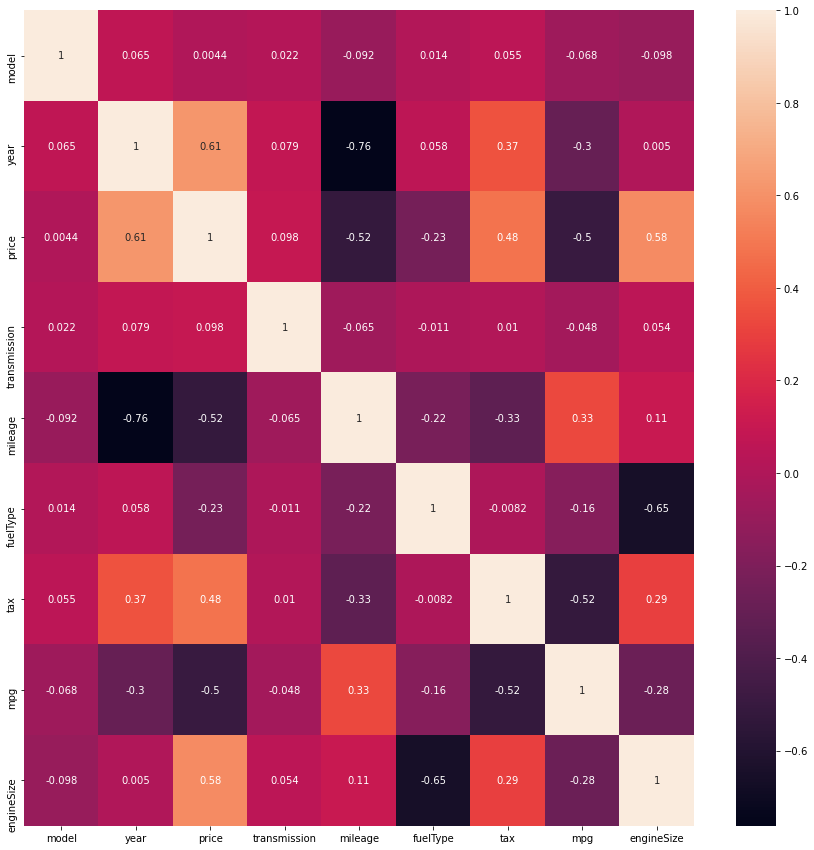

In [9]:
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr,annot=True);

*'Mileage' and 'year' show a high correlation*

In [10]:
X = np.array(df.drop(['price'],axis=1))
y = np.array(df.price)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Regressors**

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.7576566088540866

In [13]:
from sklearn.tree import DecisionTreeRegressor

reg3 = DecisionTreeRegressor(max_depth=10,max_features='auto')
reg3.fit(X_train,y_train)
reg3.score(X_test,y_test)

0.9327510065805371

In [14]:
from catboost import CatBoostRegressor

reg4 = CatBoostRegressor(loss_function='RMSE',
                        od_type='Iter',
                        silent = True)
reg4.fit(X_train,y_train)
reg4.score(X_test,y_test)

0.9614068303996399

In [15]:
for i in range(len(reg4.get_feature_importance())):
    print(df.columns.drop('price')[i],':',reg4.get_feature_importance()[i])

model : 14.704487494228259
year : 21.725301323373007
transmission : 1.8450760589525863
mileage : 8.702140160931288
fuelType : 7.280300395020111
tax : 1.4264345184554568
mpg : 28.201139609377613
engineSize : 16.115120439661652


In [16]:
y_pred = reg4.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,y_pred)
mae

1032.939298005102

*Mean Absolute Error is 1032€*

In [18]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,y_pred,squared = False)
rmse

1525.3146881642526

*Root Mean Squared Error is 1525€*

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2

0.9614068303996399

*R^2 is 0.96*

In [20]:
diff = y_pred - y_test

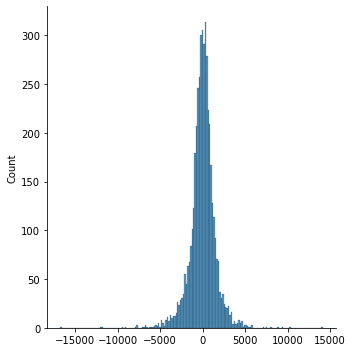

In [21]:
sns.displot(x=diff);

In [22]:
diff.max()

14126.262887224484

In [23]:
diff.min()

-16751.462676240204